In [1]:
import cv2
import os 
import numpy as np
import tensorflow as tf

In [2]:
import face_recognition

In [3]:
import matplotlib.pyplot as plt

In [4]:
img_path = r'E:/celeA/test_img/'
model_path = r'E:/celeA/'
img_path

'E:/celeA/test_img/'

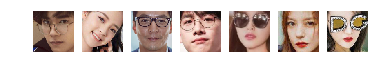

In [5]:
files = os.listdir(img_path)
imgs = []
fig = plt.figure()
for idx,f in enumerate(files):
    img = face_recognition.load_image_file(img_path+f)
    face_locations = face_recognition.face_locations(img)
    for face_location in face_locations:
        top,right,bottom,left = face_location
        width = right-left
        height = bottom-top
        
        if(width>height):
            right -= (width-height)
        elif(height>width):
            bottom -= (height-width)
       
    face_image = img[top:bottom,left:right]
    reshaped_img = cv2.resize(face_image,(100,100))
    
    ax = fig.add_subplot(1,len(files),idx+1) 
    ax.imshow(reshaped_img)
    ax.axis('off')
    imgs.append(reshaped_img)

In [6]:
np.shape(imgs)
data = np.asarray(imgs)
np.shape(data)

(7, 100, 100, 3)

In [8]:
face_dict = {1:'Has Glass',0:'No Glass'}
data = np.asarray(imgs)
ckpt = tf.train.get_checkpoint_state(model_path)   
saver = tf.train.import_meta_graph(ckpt.model_checkpoint_path +'.meta')
# 测试
with tf.Session() as sess:

    saver.restore(sess,ckpt.model_checkpoint_path)
    
    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("input/x:0")
    feed_dict = {x:data}
    
    logits = graph.get_tensor_by_name("logits_eval:0")
    
    classification_result = sess.run([logits],feed_dict)
    print(classification_result)
    
    res = np.argmax(classification_result,axis=2)
    print(res[0])
    #根据索引通过字典对应人脸的分类
    for i in range(len(res[0])):
        print("No.",i+1,"face is belong to:"+face_dict[res[0][i]])

INFO:tensorflow:Restoring parameters from E:/celeA/model-6250
[array([[ -1.9377646 ,   1.0171161 ],
       [  7.570753  ,   7.109844  ],
       [-16.443707  ,   2.9295182 ],
       [-11.002339  ,   2.2837982 ],
       [ -6.9446263 ,  -1.4254065 ],
       [  6.3655806 ,   5.704036  ],
       [ -0.56662047,  35.680435  ]], dtype=float32)]
[1 0 1 1 1 0 1]
No. 1 face is belong to:Has Glass
No. 2 face is belong to:No Glass
No. 3 face is belong to:Has Glass
No. 4 face is belong to:Has Glass
No. 5 face is belong to:Has Glass
No. 6 face is belong to:No Glass
No. 7 face is belong to:Has Glass
